In [ ]:
# Error with scientific format in plot axes
ENV["GKS_ENCODING"] = "utf8"

using Plots
using Printf
using Statistics

# The default format SVG creates figures of size 9600x6400
gr(fmt="png")
nothing

```julia
using Revise
```

In [ ]:
module MazeWorld

using ReinforcementLearningSutton.Commons: Point
using ReinforcementLearningSutton.GridWorld: GameGridWorldStatic, StateGridWorldStatic, ActionGridWorldStatic, restart, state, state_set, ncols, nrows, finished
import ReinforcementLearningSutton.GridWorld: update

struct Maze
    walls::Array{Bool, 2}
end

function update(game::GameGridWorldStatic{Maze}, action::ActionGridWorldStatic)::Int
    maze = game.ruleset
    s0 = state(game)
    
    pos_x = max(1, min(s0.pos.x + action.move.x, ncols(game)))
    pos_y = max(1, min(s0.pos.y + action.move.y, nrows(game)))
    
    if ~maze.walls[pos_y, pos_x]
        s = StateGridWorldStatic(nrows(game), ncols(game), Point(pos_x, pos_y))
        state_set(game, s)
    end
    
    finished(game) ? 1 : 0
end

end

┌ Info: Precompiling ReinforcementLearningSutton [6417796d-59bf-4f93-aaf0-e2be7741ea64]
└ @ Base loading.jl:1278


Main.MazeWorld

In [ ]:
using ReinforcementLearningSutton.Commons: LearningDynaQ, PlayerεGreedy, Point, play_game, nstep
using ReinforcementLearningSutton.GridWorld: GameGridWorldStaticBase, GameGridWorldStatic

In [ ]:
nrows = 6
ncols = 9
pos_start = Point(1, 3)
pos_goal = Point(9, 1)

allowed_movements = "cross"

maze_walls = zeros(Bool, nrows, ncols)
maze_walls[2:4, 3] .= true
maze_walls[5, 6] = true
maze_walls[1:3, 8] .= true

maze = MazeWorld.Maze(maze_walls)

game0 = GameGridWorldStaticBase(nrows, ncols, pos_start, pos_goal, allowed_movements)
game = GameGridWorldStatic(game0, maze)

maze_walls

6×9 Array{Bool,2}:
 0  0  0  0  0  0  0  1  0
 0  0  1  0  0  0  0  1  0
 0  0  1  0  0  0  0  1  0
 0  0  1  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0

### DynaQ: impact of $n$

In [ ]:
ε = 0.1
α = 0.1
γ = 0.95

ns = [0, 5, 50]
max_nsteps = 1000
ngames = 50

results = zeros(Int, ngames, length(ns))

for (i, n) in enumerate(ns)
    player = PlayerεGreedy(game, ε)
    learning = LearningDynaQ(player, n, α, γ)
    results[:, i] = [play_game(game, player, max_nsteps, learning)[1] for _ in 1:ngames]
end

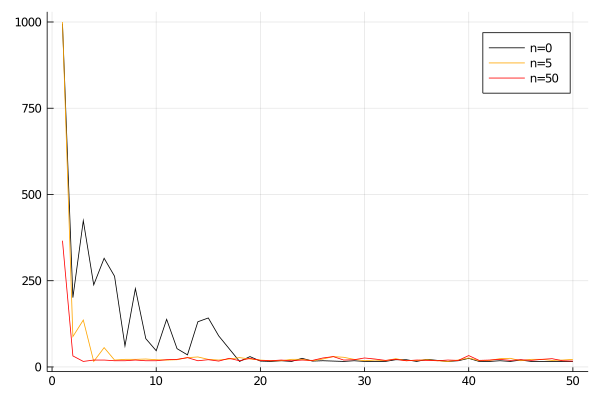

In [ ]:
plot(results, label=["n=0" "n=5" "n=50"], color = [:black :orange :red])

In [ ]:
mean(results, dims=1)

1×3 Array{Float64,2}:
 81.82  45.28  27.78